Given a housing dataset inbuilt in keras, below problem predicts house price for a given number of rooms using linear regression with the help of neural network.

*Reference*: https://learnopencv.com/tensorflow-keras-tutorial-linear-regression/

### 1. Import libraries

In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.config.list_physical_devices('GPU'))
print("CUDA Version: ", tf.sysconfig.get_build_info()["cuda_version"])
print("cuDNN Version: ", tf.sysconfig.get_build_info()["cudnn_version"])


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CUDA Version:  12.3
cuDNN Version:  8


### 2. Generate sample data

In [18]:
(X_train_all_features, y_train), (X_test_all_features, y_test) = keras.datasets.boston_housing.load_data()
X_train = X_train_all_features[:,5] # 5th column represents number of rooms
X_test = X_test_all_features[:,5] # 5th column represents number of rooms

### 3. Create, Compile and Train model

In [19]:
# Create a sequential model with one dense layer representing linear regression
# Input shape is (1,) because we have only one input which is area
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))
])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=.005), loss="mean_squared_error", metrics=['mae'])
model.fit(X_train, y_train, epochs=100, verbose=0)

### 4. Predict

In [20]:
predicted_y = model.predict(X_test) # Estimated price for 7 room
print(f'Price for {X_test} rooms is {predicted_y}$')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
Price for [6.434 5.913 5.985 6.25  6.121 5.926 6.874 6.167 5.961 6.437 6.405 6.072
 6.151 7.831 5.648 6.108 6.417 6.144 6.114 6.127 5.304 5.837 5.841 5.605
 5.876 6.242 6.879 6.728 6.38  5.878 6.176 6.833 6.826 6.245 5.713 5.
 5.597 5.877 5.983 6.635 7.104 6.625 6.185 7.686 6.563 6.153 6.616 5.782
 6.513 6.182 7.249 5.79  5.036 5.813 7.185 6.63  6.343 8.297 6.758 6.421
 6.98  6.471 6.852 6.019 6.376 6.108 6.417 6.209 5.093 5.987 6.395 6.957
 6.229 5.414 6.495 6.009 5.885 6.375 6.968 4.88  5.981 7.52  5.593 6.485
 5.705 6.172 6.229 5.951 6.593 7.061 6.03  5.884 6.897 8.259 6.812 6.122
 7.333 8.78  6.273 7.802 6.951 6.101] rooms is [[23.322586]
 [21.47347 ]
 [21.72901 ]
 [22.669538]
 [22.211697]
 [21.51961 ]
 [24.884218]
 [22.374958]
 [21.64383 ]
 [23.333231]
 [23.21966 ]
 [22.037788]
 [22.318172]
 [28.280767]
 [20.53294 ]
 [22.165556]
 [23.262249]
 [22.293327]
 [22.186852]
 [22.23299 ]
 [19.312029]
 [21.203733]
 [21.21793 ]
 [20.380327]
 [21.342152

### 5. Plot

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


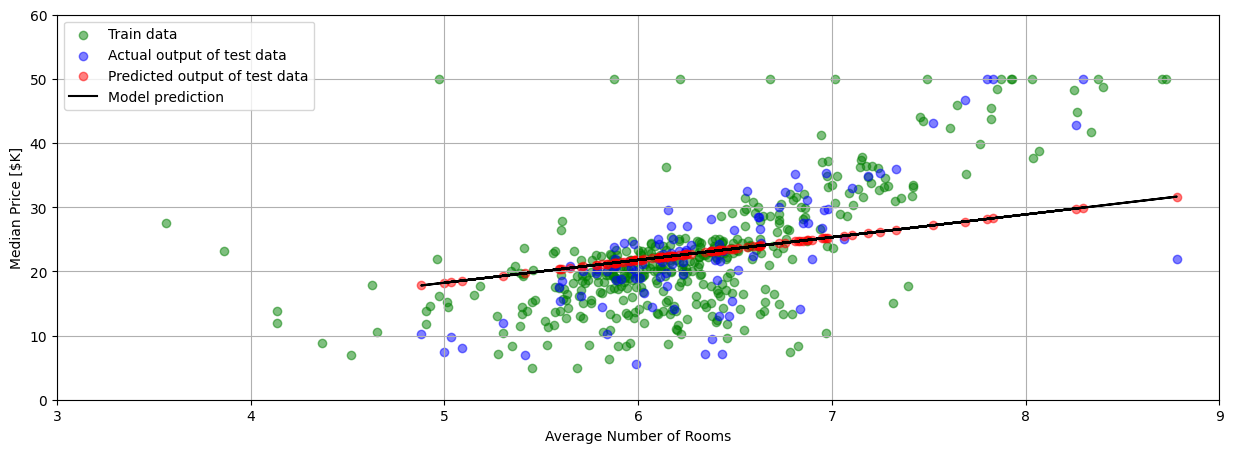

In [21]:
plt.figure(figsize=(15, 5))
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.xlim([3,9])
plt.ylim([0,60])
plt.scatter(X_train, y_train, label='Train data', color='green', alpha=0.5)
plt.scatter(X_test, y_test, label='Actual output of test data', color='blue', alpha=0.5)
plt.scatter(X_test, model.predict(X_test), label='Predicted output of test data', color='red', alpha=0.5)
plt.plot(X_test, model.predict(X_test), color='k', label='Model prediction')
plt.grid(True)
plt.legend()
plt.show()